In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

# Gathering Data

#### 1.The WeRateDogs Twitter archive 

In [2]:
# upload the file into Jupter notebook, then read the file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2.The tweet image predictions

In [6]:
# download programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [7]:
# Read the tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Each tweet's retweet count and other additional data

In [8]:
# query the Twitter API for each tweet's JSON data using Python's Tweepy library 
consumer_key = 'Ad0VGCZoW6Tzf7UzmtJUQU6jR'
consumer_secret = '4M8ACfCaRU17V6XqRaUHjnZGeXfB0mGcamveDsyX2apRa8r1zB'
access_token = '1623315782-HM3pUHNi2BKjra1sY76M7OFPxTM53ieBU7KAaMd'
access_secret = 'GTELieAwaEIKOrlRNmJO99Kh1bcGYZSnfGXMvTmNbIi3J'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
#Download Tweepy status object based on tweet_id 
list_of_tweets = []
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 734


In [10]:
# to see how many tweet ids are found in the api
len(list_of_tweets)

2331

In [11]:
# # to see how many tweet ids are not found in the api
len(cant_find_tweets_for_those_ids)

25

In [12]:
# get the json part of each tweepy status object and add them all into lists
lists = []
for each_json_tweet in list_of_tweets:
    lists.append(each_json_tweet)

In [13]:
# store each tweet's entire set of JSON data in tweet_json.txt file.

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(lists, indent=4))

In [14]:
# get information and create a dataframe
list_second = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data_injsonfile = json.load(json_file)
    for dic_1 in data_injsonfile:
        tweet_id = dic_1['id']
        favorite_count = dic_1['favorite_count']
        retweet_count = dic_1['retweet_count']
        followers_count = dic_1['user']['followers_count']
        friends_count = dic_1['user']['friends_count']
        
        list_second.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             })
        tweet_json = pd.DataFrame(list_second, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count'])

In [15]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,36070,7678,8778481,16
1,892177421306343426,31119,5679,8778481,16
2,891815181378084864,23427,3764,8778481,16
3,891689557279858688,39355,7850,8778481,16
4,891327558926688256,37594,8449,8778481,16


In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null object
favorite_count     2331 non-null int64
retweet_count      2331 non-null int64
followers_count    2331 non-null int64
friends_count      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


## Assessing data

### 1.Visual assessment

In [17]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,36070,7678,8778481,16
1,892177421306343426,31119,5679,8778481,16
2,891815181378084864,23427,3764,8778481,16
3,891689557279858688,39355,7850,8778481,16
4,891327558926688256,37594,8449,8778481,16
5,891087950875897856,18941,2835,8778481,16
6,890971913173991426,11015,1844,8778481,16
7,890729181411237888,60768,17134,8778481,16
8,890609185150312448,26057,3901,8778481,16
9,890240255349198849,29790,6659,8778481,16


### 2.Programmatic assessment

In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
# To see if there are any duplicated ids
sum(twitter_archive['tweet_id'].duplicated())

0

In [22]:
# to see the values of column rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
# to see the values of column rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
sum(image_prediction.jpg_url.duplicated())

66

In [27]:

image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [29]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [30]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id           2331 non-null object
favorite_count     2331 non-null int64
retweet_count      2331 non-null int64
followers_count    2331 non-null int64
friends_count      2331 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.1+ KB


In [32]:
tweet_json.sample(20)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
2136,669564461267722241,373,117,8778490,16
1105,729463711119904772,5736,2291,8778490,16
673,787322443945877504,7894,1773,8778483,16
877,758740312047005698,5746,1617,8778489,16
1321,704491224099647488,747,78,8778490,16
143,863079547188785154,8373,1040,8778481,16
1551,687476254459715584,1973,530,8778490,16
1605,684567543613382656,2996,1205,8778490,16
1815,675888385639251968,2317,932,8778489,16
0,892420643555336193,36070,7678,8778481,16


### Quality issues

1.Missing data

There are 2356 rows in twitter_archive table. From coding (twitter_archive.info()), we know column like "expanded_urls" only has 2297 non-null values.

2.Data validity issue

In twitter_archive table,the last few rows show some dog names are 'None', 'a', or 'an.'
These are obviously wrong.

3.Data accuracy issue

In twitter_archive table, timestamp is an object and retweeted_status_timestamp is also an object (the other retweeted statuses are floats).

4.Data consistency issue

There are some strange outliers in columns. From coding(twitter_archive.rating_denominator.value_counts()),there are 23 rating_denominators that are not equal to 10. Similarly, there are rating_numerators that are even bigger than 100.

5.Erroneous data

pupper, puppo, floofer and doggo column: There are some IDs with more than one dog stage information (two dog stages are rated).

6.Duplicated values

From coding (sum(image_prediction.jpg_url.duplicated())),we know there are some duplicated values in this column.

7.Data types are not consistent

In tweet_json table, tweet_id is object type. This is not consistent with data type in other 2 tables(int64 data type),which is not suitable for further data analysis.

8.Table size do not match

There are 2356 rows in twitter_archive, while 2075 rows in images_prediction.The size of the table do not match.



### Tidiness Issues

1 Columns issue.

Each variable forms a column. In twitter_archive table,the last four columns all relate to the stage of dogs (dogoo, floofer, pupper, puppo).

2 Untidy data.

In twitter_archive table, column source data have <a and /a> tag in HTML format surrounding the text.These are not common internet address for ordinary users.

3 Uppercase and lowercase mixture

In images prediction table, there is no consistency in p1, p2 and p3 columns. Sometimes the dog breed predictios are lowercase, sometimes they are uppercase.

4 Image_prediction table.

Tidiness require each type of observational unit forms a table.Tweet_archive and tweet_json can be merged into one table because they have same tweet_id column. 

5 Many tables VS one table

Tidiness requires each type of observational unit forms a table. These three tables can be merged into one table to make data tidy.


# Cleaning Data

In [33]:
# Copy the datasets before cleaning 
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### 1. Delete retweets

The below information shows there are repeated 158(156+2) values in retweeted_status_user_id.

In [34]:
twitter_archive_clean.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [35]:
#Delete retweets by filtering retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]


In [36]:
# check after deleting
twitter_archive_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

### 2. Delete columns that are no needed

In [37]:
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [38]:
# check the new table after deleting
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### 3. Melt columns 

In [39]:
#Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               value_name='dogs_stage')


In [40]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,variable,dogs_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None


In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 8 columns):
tweet_id              8700 non-null int64
timestamp             8700 non-null object
text                  8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  8700 non-null object
variable              8700 non-null object
dogs_stage            8700 non-null object
dtypes: int64(3), object(5)
memory usage: 543.8+ KB


In [42]:
# Then drop column varible
twitter_archive_clean = twitter_archive_clean.drop(['variable'],axis = 1)       

In [43]:
#drop duplicated rows based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')  

In [44]:
#check the column after changing
twitter_archive_clean.dogs_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

In [45]:
#check the table after changing
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dogs_stage            2175 non-null object
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


### 4. Change  timestamp and dog name

In [46]:
#convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [47]:
#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day



In [48]:
#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop(['timestamp'],axis = 1)

In [49]:
# check twitter_archive after cleaning
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
2095,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None,2015,11,19
2094,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None,2015,11,19
2093,667455448082227200,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,2015,11,19
2092,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None,2015,11,19
2091,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None,2015,11,19


In [50]:
twitter_archive_clean.name.value_counts()

None         680
a             55
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Sadie          8
Winston        8
the            8
Toby           7
Daisy          7
Jax            6
Bo             6
Oscar          6
Bella          6
Bailey         6
Stanley        6
an             6
Koda           6
Chester        5
Scout          5
Buddy          5
Dave           5
Rusty          5
Bentley        5
Milo           5
Leo            5
            ... 
Pluto          1
Herb           1
Berb           1
Kayla          1
Sage           1
Sweet          1
Millie         1
Bones          1
Sprinkles      1
Monkey         1
Spanky         1
Schnozz        1
Lucia          1
Mason          1
Tyrone         1
Banjo          1
Darrel         1
Reagan         1
Jay            1
Orion          1
Harvey         1
Ralphy         1
BeBe           1
Livvie         1
Rascal         1
Dunkin         1
Griswold       1
Gidget        

Replace "a" and "an" with "None" in column name

In [51]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('a', 'None')

In [52]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('an', 'None')

In [54]:
# check table after replacement
twitter_archive_clean.loc[twitter_archive_clean.name == 'an']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day


In [55]:
# check table after replacement
twitter_archive_clean.loc[twitter_archive_clean.name == 'a']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day


### 5. Change data type

In [56]:
# Change the data type
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 169.9+ KB


In [57]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288)]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
42,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0,10.0,BellNone,None,2017,7,8


In [58]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864)]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0,LogNonen,None,2016,10,13


In [59]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208)]
#twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
#twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,pupper,2016,9,20


In [60]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984)]
#twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
3685,681340665377193984,I've been told there's a slight possibility he...,5.0,10.0,None,None,2015,12,28


In [61]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929)]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
3708,680494726643068929,Here we have uncovered an entire battalion of ...,26.0,10.0,None,None,2015,12,25


In [62]:
twitter_archive_clean.text[twitter_archive_clean.rating_numerator == 1776]

2979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [ ]:
df_twitter['rating_numerator'].value_counts()

In [ ]:
df_twitter['rating_denominator'].value_counts()

In [187]:
#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0



6. Twitter_archive - Correct denominators
 Manually
Five tweets with denominator not equal to 10 for special circunstances. Update both numerators and denominators when necessary. Delete other five tweets because they do not have actual ratings.

In [188]:
# Update both numerators and denominators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Delete five tweets with no actual ratings
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 832088576586297345]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 682808988178739200]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 835246439529840640]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3839,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2538,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


Programatically
These tweets with denominator not equal to 10 are multiple dogs. For example, tweet_id 713900603437621000 has numerator and denominators 99/90 because there are 9 dogs in the picture https://t.co/mpvaVxKmc1.

In [189]:
#Create a new column with rating in float type to avoid converting all int column to float
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)


twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
2095,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None,2015,11,19,6.0
2094,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,CupcNoneke,None,2015,11,19,11.0
2093,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,2015,11,19,7.0
2092,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,None,2015,11,19,11.0
2091,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,2015,11,19,7.0


### 7. Delete duplicated jpg_urls

In [190]:
#Delete 66 duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [191]:
# Check after deletilng
sum(image_prediction_clean['jpg_url'].duplicated())

0

 Image_prediction - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns.

In [192]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [193]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']


image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [194]:
#Delete columns that won't be used for analysis
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)



In [195]:
#Check the table after deleting
image_prediction_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### 8. Change tweet_id data type

In [196]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

In [197]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

### 9.  Merge these into one dataframe

In [198]:
#First step, merge twitter_archive_clean and image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


In [199]:
#Second step, merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 17 columns):
tweet_id              1625 non-null int64
text                  1625 non-null object
rating_numerator      1625 non-null float64
rating_denominator    1625 non-null float64
name                  1625 non-null object
dogs_stage            1625 non-null object
year                  1625 non-null int64
month                 1625 non-null int64
day                   1625 non-null int64
rating                1625 non-null float64
jpg_url               1625 non-null object
dog_type              1625 non-null object
confidence_list       1625 non-null object
favorite_count        1619 non-null float64
retweet_count         1619 non-null float64
followers_count       1619 non-null float64
friends_count         1619 non-null float64
dtypes: float64(7), int64(4), object(6)
memory usage: 228.5+ KB


## Storing, Analyzing, and Visualizing Data

In [200]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [201]:
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,CupcNoneke,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,297.0,84.0,8779606.0,16.0
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,183.0,56.0,8779606.0,16.0
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,244.0,90.0,8779606.0,16.0
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,2015,11,19,7.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,505.0,212.0,8779606.0,16.0
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,2015,11,20,9.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,500.0,252.0,8779606.0,16.0


### 1.The most common dog type

In [202]:
df_twitter['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          20
Shih-Tzu                           20
Siberian_husky                     20
Cardigan                           19
Maltese_dog                        19
beagle                             19
Shetland_sheepdog                  19
Rottweiler                         19
kuvasz                             18
Italian_greyhound                  17
Lakeland_ter

Text(0.5,1,'The Most common Dog Type')

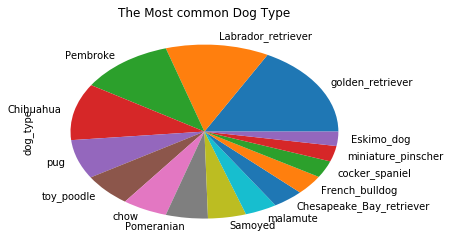

In [203]:
# Visulation of the most common dog type
# We choose the first 15 dog types and drppping other unimportant dog types
df_twitter['dog_type'].value_counts()[0:15].plot(kind = 'pie')
plt.title('The Most common Dog Type')

Obviously, golden_retriever is the most common dog type. The second type is labrador retriever. The third is pembroke. The forth is chihuahua.

### 2. The highest rating dog type

In [204]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [205]:
df_dog_type_mean.head(10)

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,2016.500000,6.000000,16.000000,8.000000,11073.500000,3130.000000,8.779710e+06,16.0
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,4808.416667,1221.583333,8.779682e+06,16.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,7696.866667,1803.133333,8.779702e+06,16.0
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,6674.000000,1259.000000,8.779717e+06,16.0
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,10164.500000,2728.000000,8.779717e+06,16.0
Bedlington_terrier,7.843395e+17,10.333333,10.0,2016.333333,6.000000,7.333333,10.333333,22917.166667,7289.500000,8.779717e+06,16.0
Bernese_mountain_dog,7.570201e+17,11.272727,10.0,2016.090909,6.090909,17.727273,11.272727,6657.000000,1414.272727,8.779695e+06,16.0
Blenheim_spaniel,7.404407e+17,11.100000,10.0,2015.800000,8.200000,13.900000,11.100000,8450.500000,2257.900000,8.779683e+06,16.0
Border_collie,7.457945e+17,10.583333,10.0,2016.083333,5.250000,14.666667,10.583333,8176.083333,1948.583333,8.779700e+06,16.0


In [206]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniatu

In [207]:
# choosing the rating higher than 11.5 in order to simplify the visulation 
df_highratings = df_dog_type_mean[df_dog_type_mean.rating >= 11.5]


Text(0.5,1,'The Highest Rating Dog Type')

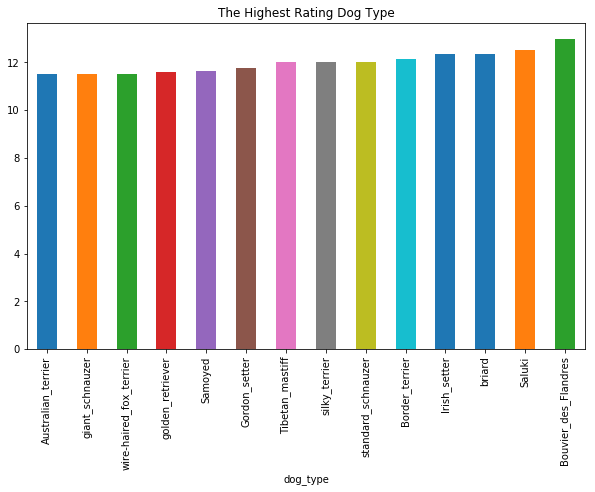

In [208]:
df_highratings['rating'].sort_values().plot(kind = "bar", figsize = (10,6))
plt.title("The Highest Rating Dog Type")

#### Bouvier_des_Flandres receilves the highest raings(13.0)
#### Japanese_spaniel receives the lowest ratings(5.0).

### 3. The most favorite dog type

In [209]:
df_favorite_sorted = df_dog_type_mean['favorite_count'].sort_values()

df_favorite_sorted

dog_type
Brabancon_griffon                802.000000
groenendael                     1051.000000
Japanese_spaniel                1214.000000
Irish_wolfhound                 1387.000000
Tibetan_terrier                 1672.750000
standard_schnauzer              1834.000000
Scottish_deerhound              2072.500000
basenji                         2265.666667
Lhasa                           2409.600000
EntleBucher                     2435.000000
papillon                        2637.333333
Maltese_dog                     2670.526316
Saint_Bernard                   2789.833333
toy_terrier                     2895.666667
redbone                         2970.333333
English_setter                  2977.857143
soft-coated_wheaten_terrier     3021.933333
miniature_schnauzer             3110.000000
miniature_poodle                3137.750000
Dandie_Dinmont                  3151.571429
Scotch_terrier                  3246.000000
Shih-Tzu                        3254.800000
Ibizan_hound           

In [210]:
# choosing the favorite counts higher than 10000 in order to simplify the visulation 
df_highfavorite = df_dog_type_mean[df_dog_type_mean.favorite_count >= 10000]

Text(0.5,1,'The Most Favorite Dog Type')

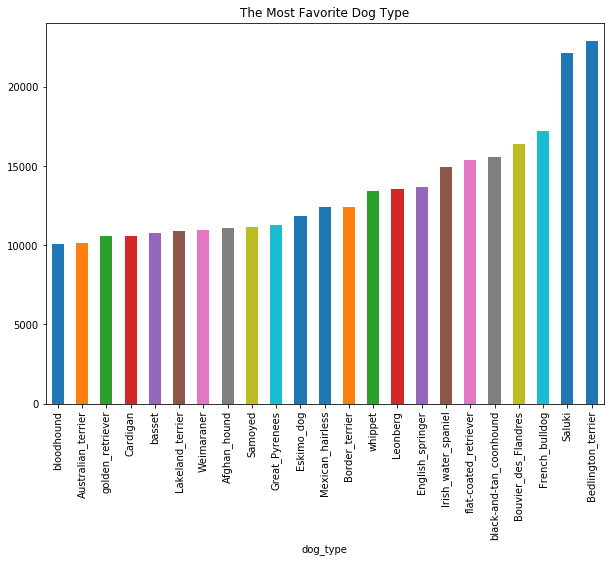

In [211]:
df_highfavorite['favorite_count'].sort_values().plot(kind = "bar", figsize = (10,7))
plt.title("The Most Favorite Dog Type")

#### Bedlington_terrier gets the most favorite counts(22922), which is different with the highest rated dog type(Bouvier_des_Flandres)
#### Brabancon_griffon gets the least favorite counts(803), which is not the lowest rated dog type(Japanese_spaniel).

### 4. The relationship between ratings and retweets


Text(0,0.5,'Ratings')

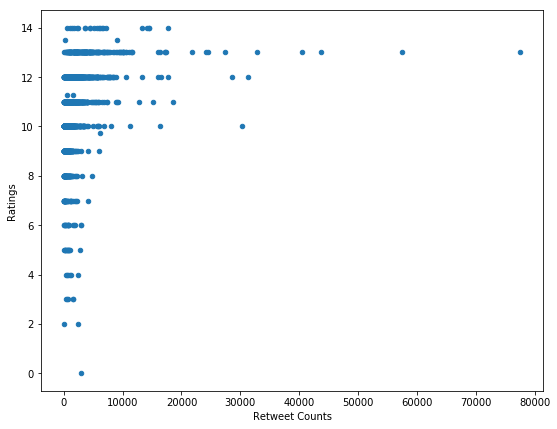

In [212]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter', figsize = (9,7))
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')


#### The highest ratings do not necessarily receive the most retweets.

### 5. The most common dog names

In [213]:
df_twitter.name.value_counts()

None           450
ChNonerlie      10
Cooper          10
Lucy            10
Oliver           9
Tucker           8
the              7
Winston          7
SNonedie         7
DNoneisy         7
Penny            7
Toby             6
KodNone          6
JNonex           6
BellNone         5
LolNone          5
Leo              5
OscNoner         5
StNonenley       5
Gus              4
Duke             4
Rusty            4
JNoneck          4
Louis            4
Scooter          4
Dexter           4
Reggie           4
Brody            4
Winnie           4
Sophie           4
              ... 
MNoneddie        1
Strudel          1
Grizz            1
JNoney           1
HNonerlso        1
Mojo             1
KrNonemer        1
Ridley           1
Pippin           1
MNoneyNone       1
Clybe            1
MNoneson         1
Link             1
Frönq            1
Ed               1
Tycho            1
Dido             1
KNoneylNone      1
Atticus          1
Cupid            1
DNonele          1
Diogi       

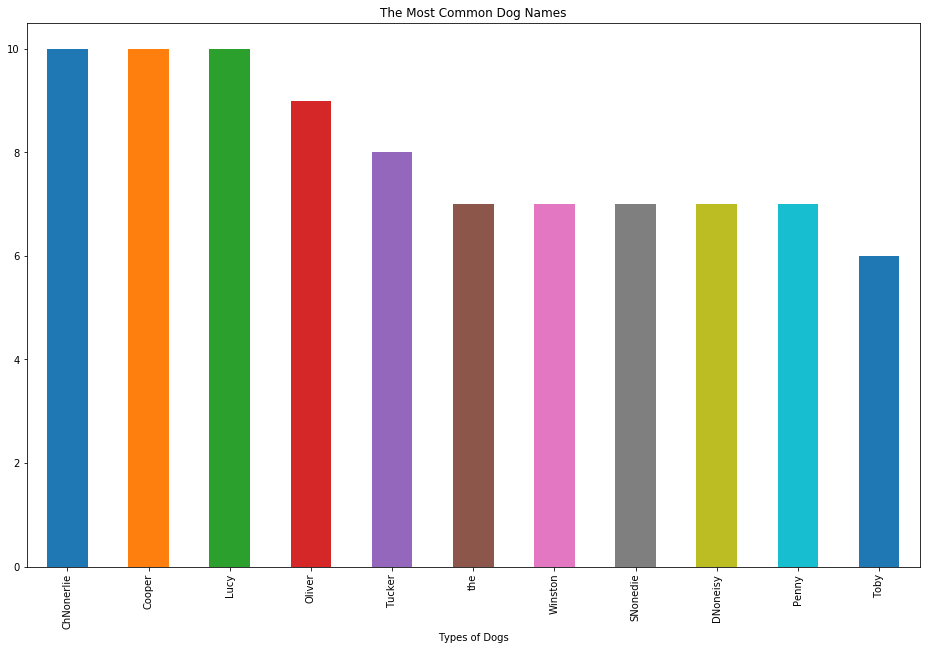

In [216]:
# None is not right dog names, we get the picture after dropping these the value.

df_twitter.name.value_counts()[1:12].plot('bar', figsize=(16,10), title='The Most Common Dog Names').set_xlabel("Types of Dogs");

#### The most popular dog namess areChNonerlie, Cooper and Lucy(all are 10), then are Oliver(9) and Tucker(8).